# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million) 

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000 11. PTRATIO: pupil-teacher ratio by town

black: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

### Import and explore the data. Clean the data for outliers and missing values. 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

ModuleNotFoundError: No module named 'visuals'

In [2]:
boston = pd.read_csv('../data/boston_data.csv')

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [85]:
boston.shape

(404, 14)

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [12]:
# boston_columns = list(boston.columns)
# for i in boston_columns:
#     sns.boxplot(y=i, data=boston)
#     plt.show()

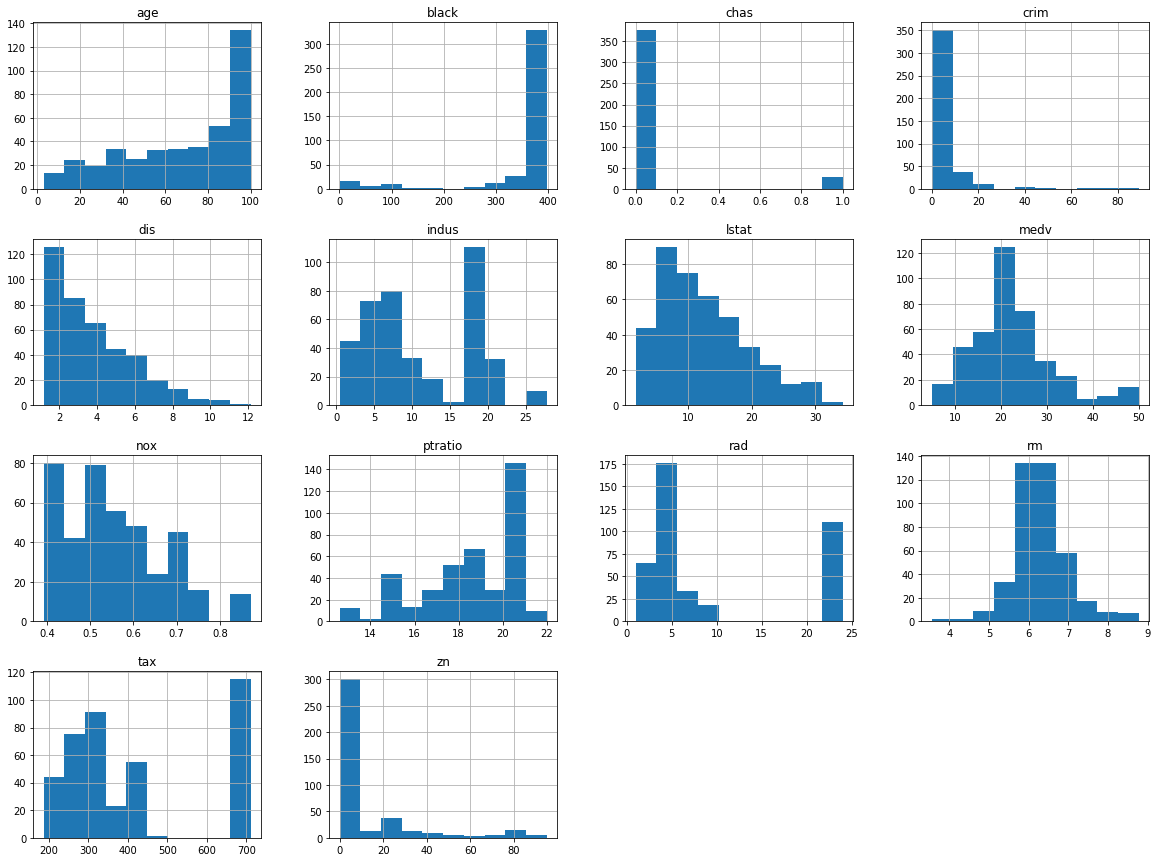

In [18]:
boston.hist(figsize=(20,15))
plt.show()

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.


mdev Vs. crim

The correlation is: -0.4009558757372439


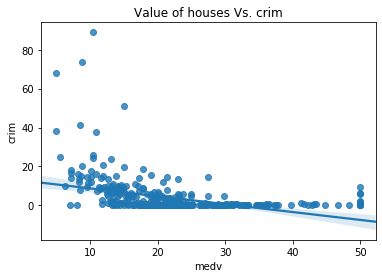

#######################################################

mdev Vs. rm

The correlation is: 0.6835409939262138


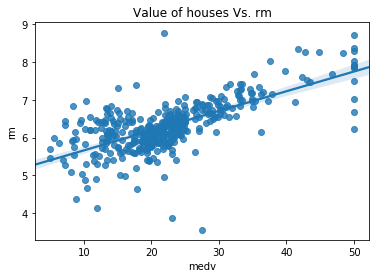

#######################################################

mdev Vs. tax

The correlation is: -0.4957924067170341


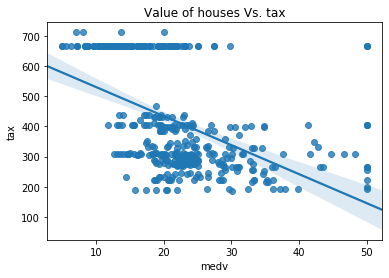

#######################################################

mdev Vs. rad

The correlation is: -0.42350839757228753


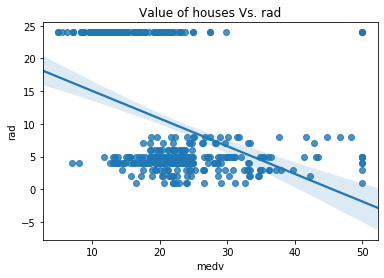

#######################################################

mdev Vs. nox

The correlation is: -0.4392251926056784


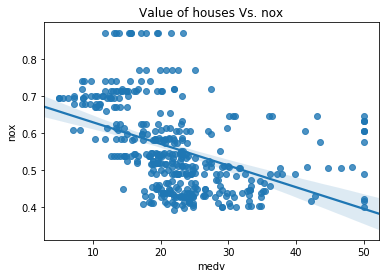

#######################################################


In [48]:
#These are the variables that I think would correlate highly with the price of homes in Boston

lst_of_variables = ['crim', 'rm', 'tax', 'rad', 'nox']


for i in lst_of_variables:
    print(f"\nmdev Vs. {i}\n")
    print ('The correlation is: ' + str(boston['medv'].corr(boston[i])))
    sns.regplot(x='medv',y=i , data=boston)
    plt.title(f"Value of houses Vs. {i}")
    plt.show()
    print('#######################################################')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

mdev Vs. crim - The correlation is: -0.4009558757372439

mdev Vs. rm - The correlation is: 0.6835409939262138

mdev Vs. tax - The correlation is: -0.4957924067170341

mdev Vs. rad - The correlation is: -0.42350839757228753

mdev Vs. nox - The correlation is: -0.4392251926056784

I was expecting that there would be a stronger correlation between the crime rate & tax and the prices of houses, but still there is a moderate correlation for these two varaiable.


mdev Vs. zn

The correlation is: 0.35560758241551615


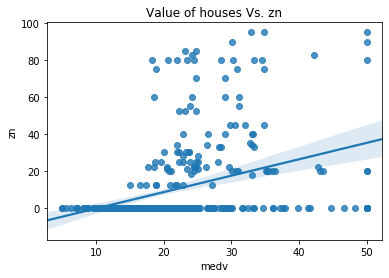

#######################################################

mdev Vs. indus

The correlation is: -0.5016982293419981


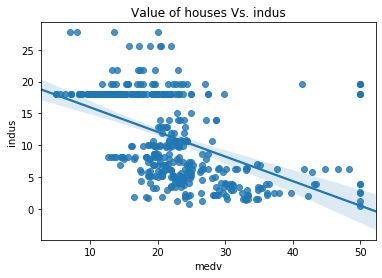

#######################################################

mdev Vs. chas

The correlation is: 0.1414004480824192


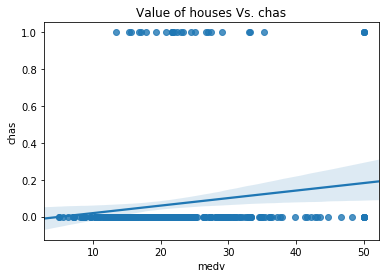

#######################################################

mdev Vs. age

The correlation is: -0.3908633514833947


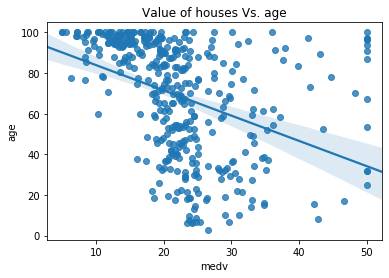

#######################################################

mdev Vs. dis

The correlation is: 0.26487595153417753


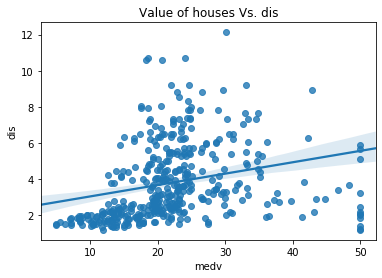

#######################################################

mdev Vs. ptratio

The correlation is: -0.5063125552383497


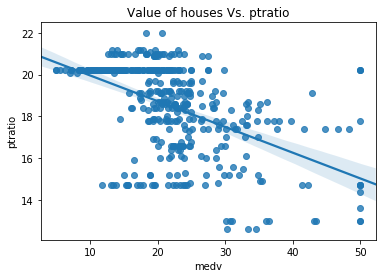

#######################################################

mdev Vs. black

The correlation is: 0.3600710918897559


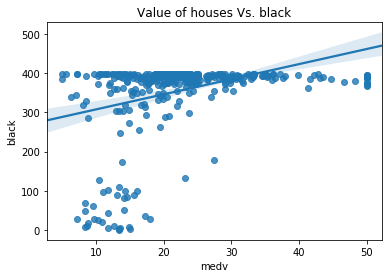

#######################################################

mdev Vs. lstat

The correlation is: -0.7426954940642161


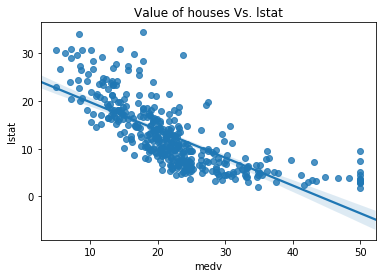

#######################################################


In [55]:
# I was curious to see the correlation and the regression line of best fit with the rest of the features.

boston_columns = list(boston.columns)
to_remove = ['medv', 'crim', 'rm', 'tax', 'rad', 'nox']
for i in to_remove:
    boston_columns.remove(i)


for i in boston_columns:
    print(f"\nmdev Vs. {i}\n")
    print ('The correlation is: ' + str(boston['medv'].corr(boston[i])))
    sns.regplot(x='medv',y=i , data=boston)
    plt.title(f"Value of houses Vs. {i}")
    plt.show()
    print('#######################################################')

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

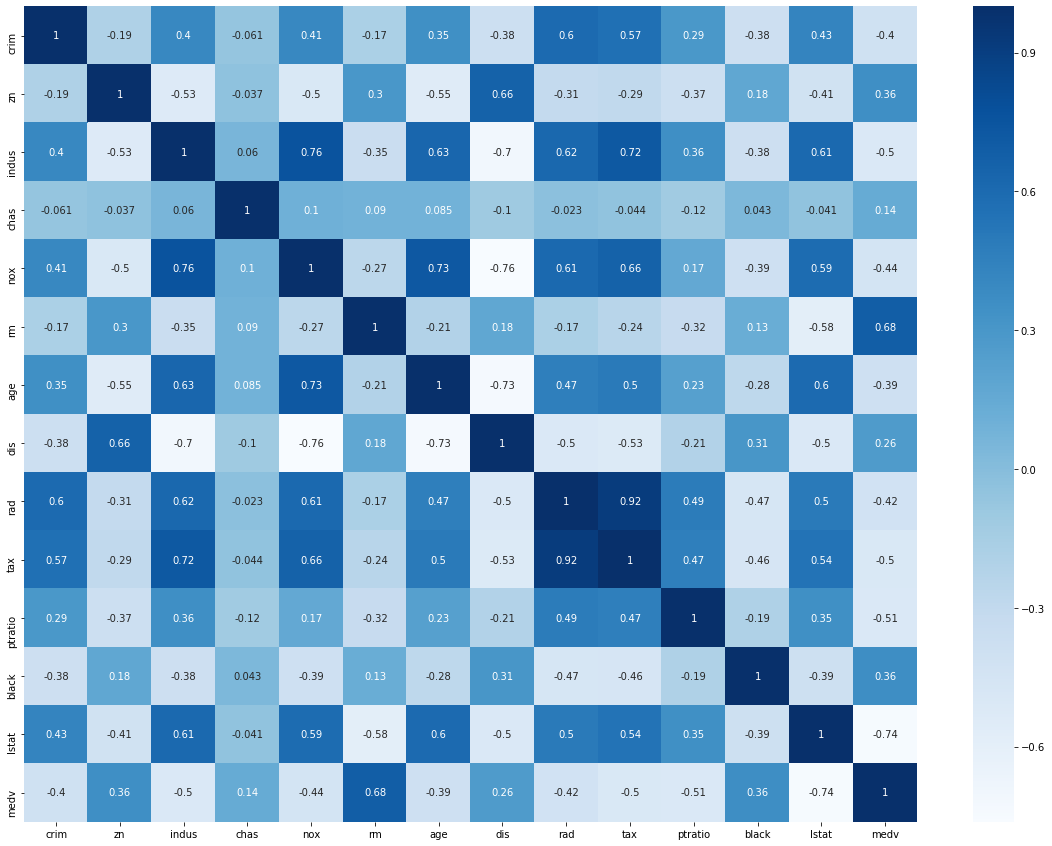

In [53]:
corr_matrix = boston.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

### From the rest of the scatter plots and the correlation matrix heatmap, we can clearly see that features like the following:
mdev Vs. indus - The correlation is: -0.5016982293419981

mdev Vs. ptratio - The correlation is: -0.5063125552383497

mdev Vs. lstat - The correlation is: -0.7426954940642161

Has a strong to moderate correlation with the prices of houses in boston and I didn't really consider any of them in my initial speculation.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [56]:
boston.medv.describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [57]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [64]:
y = boston['medv']
X = boston.drop(columns=['medv']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [65]:
rfr1 = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
rfr2 = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
rfr3 = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
rfr4 = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
rfr5 = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

In [66]:
rfr1_y_pred_train = rfr1.predict(X_train)
rfr1_y_pred_test = rfr1.predict(X_test)

rfr2_y_pred_train = rfr2.predict(X_train)
rfr2_y_pred_test = rfr2.predict(X_test)

rfr3_y_pred_train = rfr3.predict(X_train)
rfr3_y_pred_test = rfr3.predict(X_test)

rfr4_y_pred_train = rfr4.predict(X_train)
rfr4_y_pred_test = rfr4.predict(X_test)

rfr5_y_pred_train = rfr5.predict(X_train)
rfr5_y_pred_test = rfr5.predict(X_test)

In [71]:
print("For the first model with max_depth = 2")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr1_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr1_y_pred_test)}')
print('\n###############################################################\n')
print("For the second model with max_depth = 4")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr2_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr2_y_pred_test)}')
print('\n###############################################################\n')
print("For the third model with max_depth = 6")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr3_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr3_y_pred_test)}')
print('\n###############################################################\n')
print("For the forth model with max_depth = 8")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr4_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr4_y_pred_test)}')
print('\n###############################################################\n')
print("For the fifth model with max_depth = 10")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr5_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr5_y_pred_test)}')
print('\n###############################################################\n')

For the first model with max_depth = 2
the r2_score for the training set = 0.7605941689923684
the r2_score for the test set = 0.6731079140420593

###############################################################

For the second model with max_depth = 4
the r2_score for the training set = 0.8996917510026843
the r2_score for the test set = 0.7742889943786976

###############################################################

For the third model with max_depth = 6
the r2_score for the training set = 0.930977195256646
the r2_score for the test set = 0.7216852056791963

###############################################################

For the forth model with max_depth = 8
the r2_score for the training set = 0.9632507263677726
the r2_score for the test set = 0.7948011808378319

###############################################################

For the fifth model with max_depth = 10
the r2_score for the training set = 0.9614075151326863
the r2_score for the test set = 0.797449222449963

##########

In [79]:
#I made this cell and model just to confirm my hypothesis that with increasing the max_depth the R2_score of the model increases

rfr6 = RandomForestRegressor(max_depth=20).fit(X_train, y_train)

rfr6_y_pred_train = rfr6.predict(X_train)
rfr6_y_pred_test = rfr6.predict(X_test)

print("For the sixth model with max_depth = 20")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr6_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr6_y_pred_test)}')

For the sixth model with max_depth = 20
the r2_score for the training set = 0.9708283351539223
the r2_score for the test set = 0.7810675300144229


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now, plot the score for each tree on the training set and on the testing set.

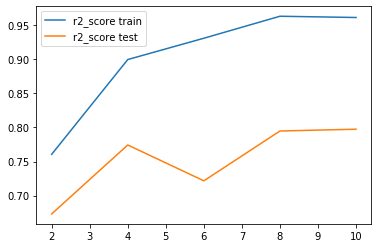

In [93]:
# Produce a plot with the score for the testing and training for the different max depths

max_depth_list = [2,4,6,8,10]
r2_scores_train = [0.7605941689923684, 0.8996917510026843, 0.930977195256646, 0.9632507263677726, 0.9614075151326863]
r2_scores_test = [0.6731079140420593, 0.7742889943786976, 0.7216852056791963, 0.7948011808378319, 0.797449222449963]

plt.plot(max_depth_list, r2_scores_train, label='r2_score train')
plt.plot(max_depth_list, r2_scores_test, label='r2_score test')
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

### It is clear to see that when we increase the max_depth the r2_score increases and that the performance becomes better. But when I increased the max_depth to 20, the r2_score didn't really increase.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [82]:
rfr7 = RandomForestRegressor(max_depth=1).fit(X_train, y_train)

rfr7_y_pred_train = rfr7.predict(X_train)
rfr7_y_pred_test = rfr7.predict(X_test)

print("For the sixth model with max_depth = 1")
print(f'the r2_score for the training set = {performance_metric(y_train, rfr7_y_pred_train)}')
print(f'the r2_score for the test set = {performance_metric(y_test, rfr7_y_pred_test)}')

For the sixth model with max_depth = 1
the r2_score for the training set = 0.5822992285211621
the r2_score for the test set = 0.47215100199371207


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### The higher the max_depth the more accurate your model is, but that also means that after a certain max_depth you will risk over fitting your model.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

### From the models above, I would say that the optimal max_depth for our dataset is from 8 to 10.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

- I think it will not be as relevant as it once was, because there are a lot of factors that changed over the years, like racism, environmental parameters, taxing, etc.

- Not really, there are other factors that people nowadays take into consideration that are not included in this dataset, like number of bathroom, if there is a garage or not, and many other factors.

- The model is good but we can't say that it is robust as it only contains 404 rows, the more data that we have the more robust the model will be.

- I don't think so, because there might be other factors/features that are more important in a rural city than in an urban city.
